In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df_behavior = pd.read_excel('Q_Purchase_Behaviour.xlsx')
df_transaction_data = pd.read_excel('Q_Transaction_Data.xlsx')
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [93]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


DATA INSPECTION AND CLEANING

In [94]:
print(df_behavior.shape)
print(df_transaction_data.shape)

(72637, 3)
(264836, 8)


In [95]:
print(df_behavior.size)
print(df_transaction_data.size)

217911
2118688


In [96]:
print(df_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [97]:
df_behavior.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [98]:
df_behavior.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [99]:

print(df_behavior.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [100]:
df_transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [101]:
df_transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [102]:
df_transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [103]:
df_transaction_data.loc[df_transaction_data['PROD_QTY']==200]
# trans.loc[trans['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [104]:
trans = df_transaction_data.loc[df_transaction_data['PROD_QTY']!=200.0]

In [105]:
# df_transaction_data.loc[df_transaction_data['PROD_QTY']==200]
trans.loc[trans['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [106]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


Merging the data frames

In [107]:
merged = pd.merge(trans, df_behavior,on='LYLTY_CARD_NBR')

In [108]:
merged.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [109]:
array = merged.select_dtypes(include=['O']).columns.tolist() #creates an array with all colums with object as dtypes
# array
# array=['PROD_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER']
for i in array:
    merged[i]=merged[i].astype('category')

In [110]:
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


grouping the data by total sales , lifestage and  premium customer

In [111]:
salessegment = merged.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()   # reset_index 
salessegment = salessegment.sort_values(by='TOT_SALES', ascending=False)
salessegment

/tmp/ipykernel_45296/2920202594.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salessegment = merged.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()   # reset_index


,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'NEW FAMILIES'),
  Text(1, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(2, 0, 'YOUNG SINGLES/COUPLES'),
  Text(3, 0, 'YOUNG FAMILIES'),
  Text(4, 0, 'OLDER FAMILIES'),
  Text(5, 0, 'RETIREES'),
  Text(6, 0, 'OLDER SINGLES/COUPLES')])

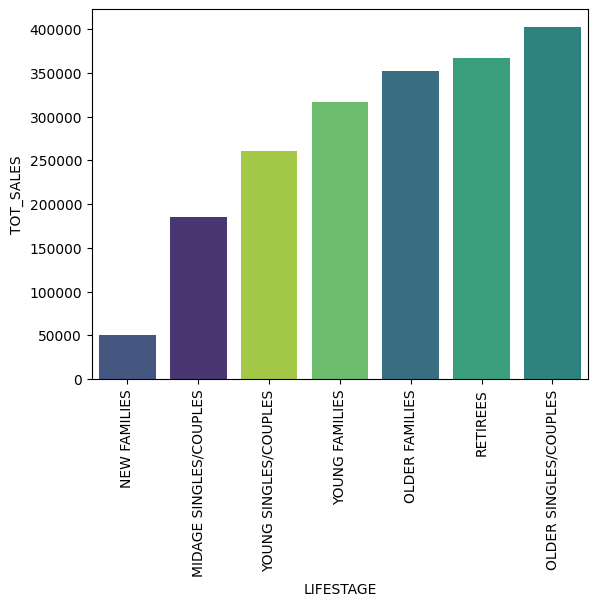

In [112]:
# sns.barplot(df,x , y, title , color)
# sns.barplot(merged, x='LIFESTAGE', y='TOT_SALES', color='red')

sns.barplot(salessegment, x='LIFESTAGE', y='TOT_SALES', palette='viridis', hue='LIFESTAGE', order=salessegment.sort_values('TOT_SALES')['LIFESTAGE'])
plt.xticks(rotation=90)

In [113]:
merged['MONTH'] = merged['DATE'].dt.to_period("M")
monthlySales = merged.groupby(['MONTH'])['TOT_SALES'].sum().reset_index()
highestSalesMonth = monthlySales.loc[monthlySales['TOT_SALES'].idxmax()]
highestSalesMonth

MONTH         2018-12
TOT_SALES    167913.4
Name: 5, dtype: object

<Axes: xlabel='MONTH', ylabel='TOT_SALES'>

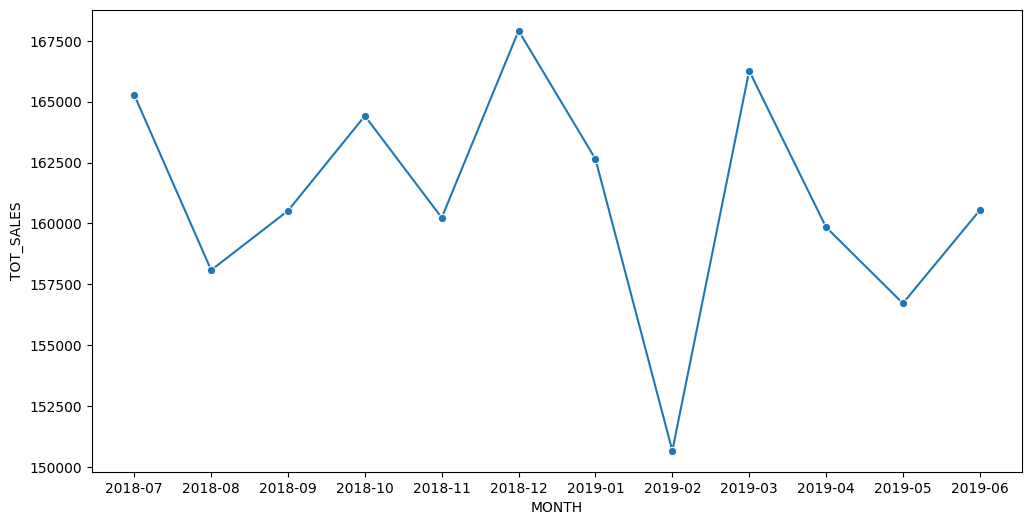

In [114]:
monthlySales=monthlySales.sort_values(by='MONTH')
monthlySales['MONTH']=monthlySales['MONTH'].astype(str)
plt.figure(figsize=(12,6))
sns.lineplot(x='MONTH',y='TOT_SALES',data=monthlySales,marker='o',linestyle='-')